### 보스턴 집 값 데이터 실습
- 보스턴 집 값 데이터를 활용하여 다항회귀를 구현해보자

### 다항회귀
- 선형 모델의 수식에서 입력 특성에 2차 이상의 항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있다

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# 한글 안깨지도록 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
boston = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [5]:
boston.shape

(506, 13)

In [6]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
# 훈련용 데이터와 평가용데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(boston, target, test_size = 0.3)

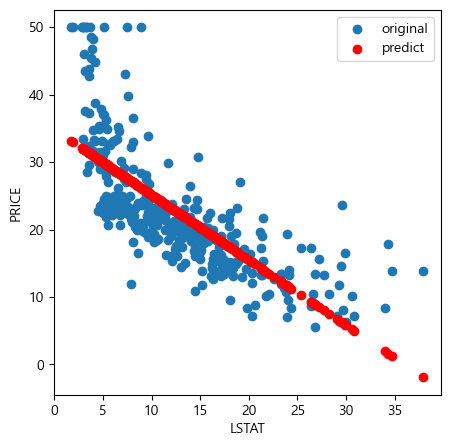

In [10]:
# 데이터 분포 확인
plt.figure(figsize = (5,5))
plt.scatter(X_train['LSTAT'], y_train, label = 'original')

# 선형회귀 모델 학습 
LSTAT_model = LinearRegression()
LSTAT_model.fit(X_train[['LSTAT']], y_train)
# 선형모델의 예측결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']])
plt.scatter(X_train['LSTAT'], pre, label='predict', color = 'red')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

plt.show()

### 다항회귀 구현하기
1. 특성확장을 통해서 다항식을 만들어준다
2. sklearn의 PolynomialFeatures를 이용한다

In [12]:
# 특성확장
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] ** 2

In [14]:
# 모델학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train)


LinearRegression()

In [15]:
# 예측
pre2 = LSTAT_model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

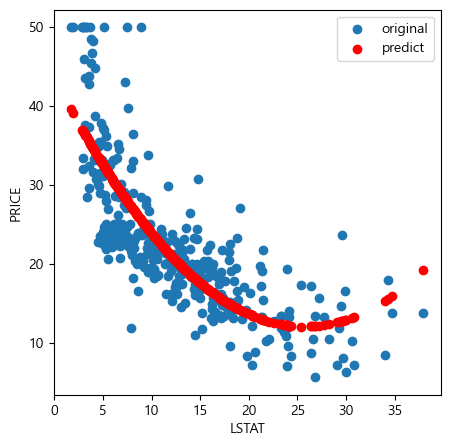

In [16]:
# 데이터 분포 확인
plt.figure(figsize = (5,5))
plt.scatter(X_train['LSTAT'], y_train, label = 'original')

plt.scatter(X_train['LSTAT'], pre2, label='predict', color = 'red')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

plt.show()

### 선형회귀 vs 다항회귀 비교

#### 단순 선형회귀

In [38]:
# 데이터 다시 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [40]:
boston = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(boston, target, test_size = 0.3)

In [44]:
lr_model = LinearRegression()

In [45]:
# 훈련/학습
lr_model.fit(X_train, y_train)

LinearRegression()

In [47]:
# 예측
pre = lr_model.predict(X_test)

In [52]:
# 평가(mse, rmse)
# mse(mean squared error) / 평균제곱오차
mse = mean_squared_error(pre, y_test)

# rmse / 평균 제곱근 오차
rmse = mse ** 0.5

print("단순 선형회귀 mse값 : ", mse)
print("단순 선형회귀 rmse값 : ", rmse)

단순 선형회귀 mse값 :  20.349918981010088
단순 선형회귀 rmse값 :  4.511088447482502


#### 다항변형기(PolynomialFeatures)를 사용하여 다항회귀 구현 

In [151]:
# 다항변형기 생성
polynomial_transformer = PolynomialFeatures(2, include_bias=False)

In [152]:
polynomial_data = polynomial_transformer.fit_transform(boston)

In [153]:
polynomial_data.shape

(506, 104)

In [154]:
# 특성확장후 컬럼명 확인
polynomial_features_names = polynomial_transformer.get_feature_names_out(boston.columns)

In [155]:
polynomial_features_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [156]:
# 문제 데이터 재생성 - polynomial을 진행한 데이터를 
# 활용해 데이터프레임 생성
X = pd.DataFrame(polynomial_data, columns = polynomial_features_names)

In [157]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [158]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [159]:
# 훈련세트와 테스트세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)

In [160]:
# 모델생성
lr_model = LinearRegression()

In [161]:
# 학습 
lr_model.fit(X_train, y_train)

LinearRegression()

In [162]:
# 예측
pre = lr_model.predict(X_test)

In [164]:
# 평가 (mse) 평균 제곱 오차
mse = mean_squared_error(pre, y_test)

# RMSE(평균 제곱근 오차)
rmse = mse ** 0.5

print("다항회귀(2) mse:", mse)
print("다항회귀(2) rmse:", rmse)

다항회귀(2) mse: 17.769905400306026
다항회귀(2) rmse: 4.215436561058182


In [165]:
# 가중치 (w) .coef_
lr_model.coef_

array([-6.26732163e+00,  2.71173621e-01, -3.67963889e+00,  5.07136513e+01,
        4.19395634e+01,  1.83470571e+01,  1.20905306e+00, -5.35016285e+00,
        4.11763506e+00,  1.97980125e-03,  5.35231409e+00,  9.19340622e-02,
        7.91602557e-01,  3.46476386e-03,  2.12944462e-01,  6.56966176e-01,
        2.60152512e+00, -2.62703031e-01,  2.63531109e-01, -6.70252489e-03,
       -3.76498902e-01,  6.43484827e-01, -5.63944579e-02,  7.69289008e-01,
       -3.72278509e-04,  2.57981817e-02, -3.44123416e-04,  9.07409770e-04,
       -3.18044233e-02, -6.42195844e-01,  2.52617848e-02,  4.29954374e-04,
       -8.90195400e-03, -2.44791284e-02,  6.70791453e-04, -7.82211803e-03,
       -8.80860867e-05, -5.91645536e-03,  3.68289659e-02, -3.83680511e-02,
        1.27917225e+00,  3.06074544e-01,  2.13636597e-03,  8.65242995e-02,
        5.77577694e-02,  2.66562590e-04, -3.96711284e-02,  9.62856337e-04,
       -7.86497705e-03,  5.07136513e+01, -6.30300830e+01, -7.23872109e+00,
        1.93911776e-02,  

In [166]:
# 절편/편향 확인
lr_model.intercept_

-144.6221004437548

### 규제 
- L1(Lasso), L2(Ridge) 모델 활용하기

#### L2규제 (Ridge)

In [167]:
from sklearn.linear_model import Ridge

In [172]:
ridge_model = Ridge(alpha = 0.01)

In [173]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [174]:
# 예측
ridge_pre = ridge_model.predict(X_test)

In [175]:
# 평가
# mse (평균 제곱 오차)
mse = mean_squared_error(ridge_pre, y_test)

# rmse (평균 제곱근 오차 )
rmse = mse ** 0.5

# r2스코어
r2 = r2_score(ridge_pre, y_test)

print('ridge모델 mse : ', mse)
print('ridge모델 rmse : ', rmse)
print('ridge모델 r2 : ', r2)


ridge모델 mse :  17.44032502709819
ridge모델 rmse :  4.176161518320166
ridge모델 r2 :  0.8114916477143554


#### L1규제 (Lasso)

In [176]:
from sklearn.linear_model import Lasso

In [177]:
lasso_model = Lasso(alpha = 0.01)

In [178]:
lasso_model.fit(X_train, y_train)

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+03, tolerance: 2.721e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [179]:
lasso_pre = lasso_model.predict(X_test)

In [180]:
# 평가 (mse, rmse, r2)
mse = mean_squared_error(lasso_pre, y_test)

rmse = mse ** 0.5

r2 = r2_score(lasso_pre, y_test)

print("Lasso mse:", mse)
print("Lasso rmse:", rmse)
print("Lasso r2:", r2)

Lasso mse: 16.753842941257517
Lasso rmse: 4.093145849008745
Lasso r2: 0.8127999924680477


### Ridge vs Lasso 

In [182]:
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
ridge_coef_list = []
lasso_coef_list = []

for a in alpha_list:
    r_model = Ridge(alpha = a)
    l_model = Lasso(alpha = a)
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.14575e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+03, tolerance: 2.721e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+03, tolerance: 2.721e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_

In [193]:
# 데이터 프레임형태로 변환
# 릿지회귀는 회귀계수 값이 0에 가까워지나 0이 될 수는 없음
rid_df = pd.DataFrame(np.array(ridge_coef_list).T, columns = alpha_list)
rid_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-6.135036,-6.553769,-4.883296,-0.081839,-0.004887,-0.000577
1,0.250385,0.300019,0.233133,-0.180379,-0.220831,-0.054762
2,-3.324958,-2.806567,-2.120284,0.028338,0.045349,0.009761
3,47.658439,30.454408,8.426135,0.087312,0.001120,-0.000145
4,4.052779,-0.651902,-0.248820,0.029368,0.005969,0.000696
...,...,...,...,...,...,...
99,0.000933,0.000693,0.000024,-0.001580,-0.002222,-0.002434
100,0.019735,0.018138,0.026320,0.040825,0.036672,0.026667
101,-0.000064,-0.000063,-0.000060,-0.000052,-0.000048,-0.000033
102,0.000086,0.000092,0.000100,-0.000099,-0.000197,-0.000042


In [196]:
# L1규제(라쏘) 는 규제강도(alpha)가 커지면 특성 선택이 일어난다.
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T, columns = alpha_list)
lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.885370,-0.773201,0.000000,0.000000,-0.000000,-0.000000
1,-0.350835,-0.319435,-0.268316,-0.000000,0.000000,0.000000
2,1.014039,0.924559,0.000000,0.000000,-0.000000,-0.000000
3,39.272986,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
...,...,...,...,...,...,...
99,0.002134,0.001680,0.001617,-0.005008,-0.002337,-0.000000
100,0.019376,0.023437,0.018772,-0.000000,-0.000000,-0.000000
101,-0.000069,-0.000059,-0.000046,-0.000009,-0.000026,0.000034
102,0.000094,0.000030,-0.000335,-0.000395,-0.000679,-0.001706
